In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=733893a0b6a947e9e5c52d31cbaeca3c


In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kalmunai
Processing Record 2 of Set 1 | varnamo
Processing Record 3 of Set 1 | bilma
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | uyuni
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | mogadishu
Processing Record 16 of Set 1 | west wendover
Processing Record 17 of Set 1 | sumbe
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | erdenet
Processing Record 21 of Set 1 | zhangye
Processing Record 22 of Set 1 | saleaula
City not found. Skipping...
Processing Record 23 of

Processing Record 38 of Set 4 | girvan
Processing Record 39 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | palauig
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | henties bay
Processing Record 45 of Set 4 | mezen
Processing Record 46 of Set 4 | astara
Processing Record 47 of Set 4 | ishlei
City not found. Skipping...
Processing Record 48 of Set 4 | bacolod
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | suntar
Processing Record 2 of Set 5 | aykhal
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | lumberton
Processing Record 6 of Set 5 | korla
Processing Record 7 of Set 5 | portland
Processing Record 8 of Set 5 | jaipur hat
City not found. Skipping...
Processing Record 9 of Set 5 | necochea
Processing Record 10 of Set 5 | brae
P

Processing Record 26 of Set 8 | ullal
Processing Record 27 of Set 8 | flin flon
Processing Record 28 of Set 8 | luau
Processing Record 29 of Set 8 | chicama
Processing Record 30 of Set 8 | sao paulo de olivenca
Processing Record 31 of Set 8 | khorixas
Processing Record 32 of Set 8 | nagato
Processing Record 33 of Set 8 | guicheng
City not found. Skipping...
Processing Record 34 of Set 8 | turukhansk
Processing Record 35 of Set 8 | ternate
Processing Record 36 of Set 8 | ust-barguzin
Processing Record 37 of Set 8 | senno
Processing Record 38 of Set 8 | antofagasta
Processing Record 39 of Set 8 | dolores
Processing Record 40 of Set 8 | amarwara
Processing Record 41 of Set 8 | rundu
Processing Record 42 of Set 8 | mikhaylovka
Processing Record 43 of Set 8 | hanmer springs
Processing Record 44 of Set 8 | kuybysheve
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | yangambi
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | ndjole
Processing Reco

Processing Record 12 of Set 12 | san rafael
Processing Record 13 of Set 12 | moscow
Processing Record 14 of Set 12 | fortuna
Processing Record 15 of Set 12 | casambalangan
Processing Record 16 of Set 12 | mirzapur
Processing Record 17 of Set 12 | deputatskiy
Processing Record 18 of Set 12 | khasan
Processing Record 19 of Set 12 | algiers
Processing Record 20 of Set 12 | tacuarembo
Processing Record 21 of Set 12 | kannangad
Processing Record 22 of Set 12 | afmadu
City not found. Skipping...
Processing Record 23 of Set 12 | lokosovo
Processing Record 24 of Set 12 | payo
Processing Record 25 of Set 12 | nevsehir
Processing Record 26 of Set 12 | juybar
Processing Record 27 of Set 12 | gweru
Processing Record 28 of Set 12 | bontang
Processing Record 29 of Set 12 | kutum
Processing Record 30 of Set 12 | basco
Processing Record 31 of Set 12 | agudos
Processing Record 32 of Set 12 | zhigansk
Processing Record 33 of Set 12 | san andres
Processing Record 34 of Set 12 | caramay
Processing Record 

In [26]:
len(city_data)

536

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kalmunai,7.4167,81.8167,74.89,74,84,3.18,LK,2022-02-02 22:04:21
1,Varnamo,57.1860,14.0400,27.48,94,13,4.97,SE,2022-02-02 22:04:21
2,Bilma,18.6853,12.9164,61.74,17,0,13.44,NE,2022-02-02 22:04:22
3,Ushuaia,-54.8000,-68.3000,46.76,59,94,6.82,AR,2022-02-02 22:01:00
4,Butaritari,3.0707,172.7902,81.73,79,29,17.83,KI,2022-02-02 22:03:54
5,Esperance,-33.8667,121.9000,60.71,72,2,12.15,AU,2022-02-02 22:04:22
6,Carnarvon,-24.8667,113.6333,78.04,79,75,13.27,AU,2022-02-02 22:04:22
7,Georgetown,5.4112,100.3354,80.53,85,20,2.30,MY,2022-02-02 22:01:41
8,Uyuni,-20.4597,-66.8250,57.60,49,67,3.33,BO,2022-02-02 22:04:23
9,Barrow,71.2906,-156.7887,-20.18,69,0,3.44,US,2022-02-02 22:04:23


In [29]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kalmunai,LK,2022-02-02 22:04:21,7.4167,81.8167,74.89,74,84,3.18
1,Varnamo,SE,2022-02-02 22:04:21,57.1860,14.0400,27.48,94,13,4.97
2,Bilma,NE,2022-02-02 22:04:22,18.6853,12.9164,61.74,17,0,13.44
3,Ushuaia,AR,2022-02-02 22:01:00,-54.8000,-68.3000,46.76,59,94,6.82
4,Butaritari,KI,2022-02-02 22:03:54,3.0707,172.7902,81.73,79,29,17.83
...,...,...,...,...,...,...,...,...,...
531,Caramay,PH,2022-02-02 22:17:20,10.1815,119.2360,77.99,87,100,8.03
532,Nabire,ID,2022-02-02 22:14:26,-3.3667,135.4833,75.58,89,100,2.73
533,Rehoboth,NA,2022-02-02 22:17:20,-23.3167,17.0833,70.54,41,10,10.63
534,Pisco,PE,2022-02-02 22:17:21,-13.7000,-76.2167,77.05,57,0,20.71


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

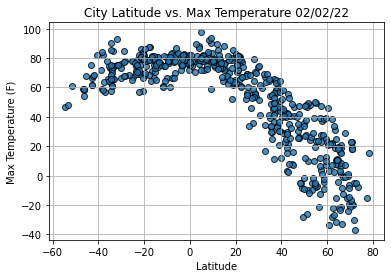

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

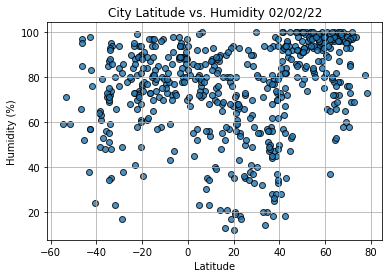

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

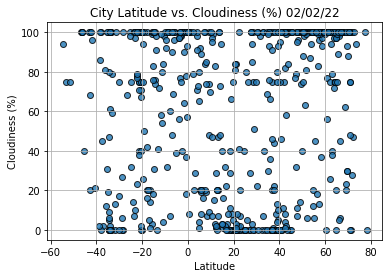

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

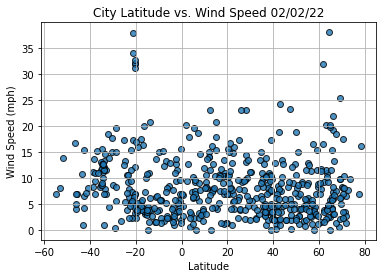

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()